In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/Data Validation')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
with ZipFile('cifar_attempts.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

### Data 1

In [ ]:
a = np.load('data1.npz')
for k in a.keys():
  print(k)
  print(a[k].shape)
  print('--------------')

train_imgs
(36004, 32, 32, 3)
--------------
train_lbls
(36004,)
--------------
val_imgs
(3996, 32, 32, 3)
--------------
val_lbls
(3996,)
--------------
test_imgs
(10000, 32, 32, 3)
--------------
test_lbls
(10000,)
--------------


['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']
6


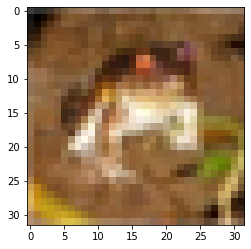

In [ ]:
print(a.files)
a_train_img = a['train_imgs']
a_train_lbl = a['train_lbls']
a_val_img = a['val_imgs']
a_val_lbl = a['val_lbls']
a_test_img = a['test_imgs']
a_test_lbl = a['test_lbls']
print(a_train_lbl[0])
plt.imshow(a_train_img[0])

In [ ]:
data = tf.data.Dataset.from_tensor_slices(
    (a_train_img, a_train_lbl.astype(np.int32)))
data = data.shuffle(buffer_size=30000).batch(128).repeat()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, 2, activation='relu', strides=1, input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, 2, activation='relu', strides=1))
model.add(tf.keras.layers.MaxPool2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               156900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), optimizer= tf.keras.optimizers.Adam(), metrics= ['accuracy'])
history = model.fit(a_train_img, a_train_lbl, batch_size=64, epochs=5, validation_data=(a_val_img, a_val_lbl))
test_scores = model.evaluate(a_test_img, a_test_lbl, verbose= 2)

Epoch 1/5
563/563 [==============================] - 20s 35ms/step - loss: 1.4324 - accuracy: 0.4667 - val_loss: 1.1770 - val_accuracy: 0.5741
Epoch 2/5
563/563 [==============================] - 20s 35ms/step - loss: 1.1034 - accuracy: 0.6012 - val_loss: 1.0230 - val_accuracy: 0.6354
Epoch 3/5
563/563 [==============================] - 20s 35ms/step - loss: 0.9910 - accuracy: 0.6431 - val_loss: 0.9252 - val_accuracy: 0.6689
Epoch 4/5
563/563 [==============================] - 20s 35ms/step - loss: 0.9144 - accuracy: 0.6720 - val_loss: 0.9195 - val_accuracy: 0.6657
Epoch 5/5
563/563 [==============================] - 20s 35ms/step - loss: 0.8663 - accuracy: 0.6906 - val_loss: 0.8803 - val_accuracy: 0.6754
313/313 - 2s - loss: 3.5931 - accuracy: 0.5362


In [ ]:
# import time
# logdir = os.path.join("logs/linear/")
# train_writer = tf.summary.create_file_writer(os.path.join(logdir, "train"))
# test_writer = tf.summary.create_file_writer(os.path.join(logdir, "test"))

model.trainable_variables[5]
# with train_writer.as_default():
#   tf.summary.histogram("trainables: ", variables, tf.summary.experimental.set_step(1000))

<tf.Variable 'dense/bias:0' shape=(100,) dtype=float32, numpy=
array([-0.04199282, -0.01109202,  0.01809849, -0.00599253, -0.02764566,
       -0.00941863, -0.01066174, -0.0075799 , -0.00709196,  0.1320982 ,
       -0.00899521,  0.09519899, -0.00946789, -0.00526843, -0.00787898,
       -0.01094063,  0.04540119, -0.05013397, -0.00518117,  0.09208039,
        0.02402725, -0.00436031,  0.07529046,  0.09962696, -0.00874002,
       -0.01807731, -0.007661  , -0.01704827, -0.00617809,  0.11075309,
       -0.00859866, -0.0062969 , -0.00552337, -0.00301385,  0.03644913,
       -0.01233861, -0.00719826, -0.01221152, -0.00462271, -0.01912825,
       -0.02412671, -0.00605043,  0.0023684 , -0.02148658,  0.0047972 ,
       -0.0080545 , -0.1262318 , -0.01175542, -0.00600093,  0.01016174,
       -0.01468135,  0.13305956,  0.00563778,  0.08447563, -0.0309513 ,
       -0.00600037,  0.01573297,  0.00298648, -0.00827418, -0.0125709 ,
       -0.00720187, -0.00764333,  0.13312644,  0.10640785,  0.06765203,
 

In [ ]:
# # then load/run tensorboard

# %load_ext tensorboard
# %tensorboard --logdir logs

### Data 2

In [ ]:
b = np.load('data2.npz')
for k in b.keys():
  print(k)
  print(b[k].shape)
  print('--------------')

train_imgs
(50000, 32, 32, 3)
--------------
train_lbls
(50000,)
--------------
val_imgs
(5000, 32, 32, 3)
--------------
val_lbls
(5000,)
--------------
test_imgs
(10000, 32, 32, 3)
--------------
test_lbls
(10000,)
--------------


['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']
6


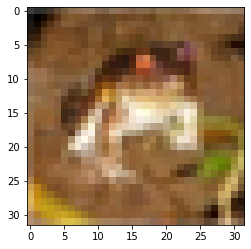

In [ ]:
print(b.files)
b_train_img = b['train_imgs']
b_train_lbl = b['train_lbls']
b_val_img = b['val_imgs']
b_val_lbl = b['val_lbls']
b_test_img = b['test_imgs']
b_test_lbl = b['test_lbls']
print(b_train_lbl[0])
plt.imshow(b_train_img[0])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, 2, activation='relu', strides=1, input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, 2, activation='relu', strides=1))
model.add(tf.keras.layers.MaxPool2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 31, 31, 16)        208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               156900    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), optimizer= tf.keras.optimizers.Adam(), metrics= ['accuracy'])
history = model.fit(b_train_img, b_train_lbl, batch_size=64, epochs=5, validation_data=(b_val_img, b_val_lbl))
test_scores = model.evaluate(b_test_img, b_test_lbl, verbose= 2)

Epoch 1/5
782/782 [==============================] - 28s 35ms/step - loss: 1.6148 - accuracy: 0.4188 - val_loss: 1.3209 - val_accuracy: 0.5282
Epoch 2/5
782/782 [==============================] - 28s 36ms/step - loss: 1.2629 - accuracy: 0.5527 - val_loss: 1.1631 - val_accuracy: 0.6006
Epoch 3/5
782/782 [==============================] - 28s 35ms/step - loss: 1.1417 - accuracy: 0.6001 - val_loss: 1.0447 - val_accuracy: 0.6378
Epoch 4/5
782/782 [==============================] - 28s 35ms/step - loss: 1.0603 - accuracy: 0.6296 - val_loss: 0.9892 - val_accuracy: 0.6554
Epoch 5/5
782/782 [==============================] - 28s 35ms/step - loss: 1.0008 - accuracy: 0.6503 - val_loss: 0.9241 - val_accuracy: 0.6792
313/313 - 2s - loss: 1.0420 - accuracy: 0.6366


### Data 3

In [ ]:
c = np.load('data3.npz')
for k in c.keys():
  print(k)
  print(c[k].shape)
  print('--------------')

train_imgs
(45000, 32, 32, 3)
--------------
train_lbls
(45000,)
--------------
val_imgs
(5000, 32, 32, 3)
--------------
val_lbls
(5000,)
--------------
test_imgs
(10000, 32, 32, 3)
--------------
test_lbls
(10000,)
--------------


['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']
6


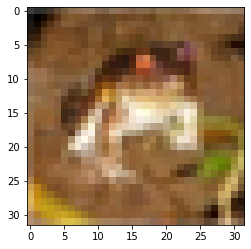

In [ ]:
print(c.files)
c_train_img = c['train_imgs']
c_train_lbl = c['train_lbls']
c_val_img = c['val_imgs']
c_val_lbl = c['val_lbls']
c_test_img = c['test_imgs']
c_test_lbl = c['test_lbls']
print(c_train_lbl[0])
plt.imshow(c_train_img[0])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, 2, activation='relu', strides=1, input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, 2, activation='relu', strides=1))
model.add(tf.keras.layers.MaxPool2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 31, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               156900    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), optimizer= tf.keras.optimizers.Adam(), metrics= ['accuracy'])
history = model.fit(c_train_img, c_train_lbl, batch_size=64, epochs=5, validation_data=(c_val_img, c_val_lbl))
test_scores = model.evaluate(c_test_img, c_test_lbl, verbose= 2)

Epoch 1/5
704/704 [==============================] - 25s 36ms/step - loss: 1.5348 - accuracy: 0.4503 - val_loss: 1.3378 - val_accuracy: 0.5222
Epoch 2/5
704/704 [==============================] - 25s 36ms/step - loss: 1.2169 - accuracy: 0.5692 - val_loss: 1.1592 - val_accuracy: 0.5980
Epoch 3/5
704/704 [==============================] - 25s 36ms/step - loss: 1.1093 - accuracy: 0.6089 - val_loss: 1.0798 - val_accuracy: 0.6242
Epoch 4/5
704/704 [==============================] - 25s 35ms/step - loss: 1.0222 - accuracy: 0.6418 - val_loss: 1.0191 - val_accuracy: 0.6510
Epoch 5/5
704/704 [==============================] - 25s 35ms/step - loss: 0.9623 - accuracy: 0.6631 - val_loss: 0.9879 - val_accuracy: 0.6600
313/313 - 2s - loss: 8.1233 - accuracy: 0.2368


### Data 4

In [ ]:
d = np.load('data4.npz')
for k in d.keys():
  print(k)
  print(d[k].shape)
  print('--------------')

train_imgs
(45000, 32, 32, 3)
--------------
train_lbls
(45000,)
--------------
val_imgs
(5000, 32, 32, 3)
--------------
val_lbls
(5000,)
--------------
test_imgs
(10000, 32, 32, 3)
--------------
test_lbls
(10000,)
--------------


['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']
8


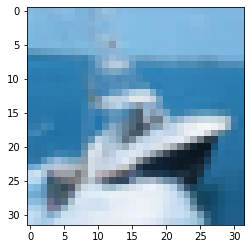

In [ ]:
print(d.files)
d_train_img = d['train_imgs']
d_train_lbl = d['train_lbls']
d_val_img = d['val_imgs']
d_val_lbl = d['val_lbls']
d_test_img = d['test_imgs']
d_test_lbl = d['test_lbls']
print(d_train_lbl[0])
plt.imshow(d_train_img[0])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, 2, activation='relu', strides=1, input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, 2, activation='relu', strides=1))
model.add(tf.keras.layers.MaxPool2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 31, 16)        208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               156900    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), optimizer= tf.keras.optimizers.Adam(), metrics= ['accuracy'])
history = model.fit(d_train_img, d_train_lbl, batch_size=64, epochs=5, validation_data=(d_val_img, d_val_lbl))
test_scores = model.evaluate(d_test_img, d_test_lbl, verbose= 2)

Epoch 1/5
704/704 [==============================] - 25s 36ms/step - loss: 0.0504 - accuracy: 0.9889 - val_loss: 5.2452e-07 - val_accuracy: 1.0000
Epoch 2/5
704/704 [==============================] - 25s 36ms/step - loss: 2.4233e-07 - accuracy: 1.0000 - val_loss: 9.5367e-08 - val_accuracy: 1.0000
Epoch 3/5
704/704 [==============================] - 25s 36ms/step - loss: 5.4370e-08 - accuracy: 1.0000 - val_loss: 2.3842e-08 - val_accuracy: 1.0000
Epoch 4/5
704/704 [==============================] - 25s 36ms/step - loss: 2.4833e-08 - accuracy: 1.0000 - val_loss: 2.3842e-08 - val_accuracy: 1.0000
Epoch 5/5
704/704 [==============================] - 25s 36ms/step - loss: 3.6457e-08 - accuracy: 1.0000 - val_loss: 4.7684e-08 - val_accuracy: 1.0000
313/313 - 2s - loss: 5.8394 - accuracy: 0.1336


### Data 4

In [ ]:
d = np.load('data4.npz')
for k in d.keys():
  print(k)
  print(d[k].shape)
  print('--------------')

train_imgs
(45000, 32, 32, 3)
--------------
train_lbls
(45000,)
--------------
val_imgs
(5000, 32, 32, 3)
--------------
val_lbls
(5000,)
--------------
test_imgs
(10000, 32, 32, 3)
--------------
test_lbls
(10000,)
--------------


['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']
8


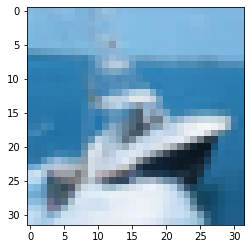

In [ ]:
print(d.files)
d_train_img = d['train_imgs']
d_train_lbl = d['train_lbls']
d_val_img = d['val_imgs']
d_val_lbl = d['val_lbls']
d_test_img = d['test_imgs']
d_test_lbl = d['test_lbls']
print(d_train_lbl[0])
plt.imshow(d_train_img[0])

In [ ]:
data4 = tf.data.Dataset.from_tensor_slices(
    (d_train_img, d_train_lbl.astype(np.int32)))
data4 = data4.shuffle(buffer_size=30000).batch(128).repeat()

test_data4 = tf.data.Dataset.from_tensor_slices(
    (d_test_img, d_test_lbl.astype(np.int32))).batch(128)


In [ ]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Conv2D(16, 2, activation='relu', strides=1, input_shape=(32,32,3)))
model4.add(tf.keras.layers.MaxPool2D((2, 2)))
model4.add(tf.keras.layers.Conv2D(32, 2, activation='relu', strides=1))
model4.add(tf.keras.layers.MaxPool2D((2, 2)))

model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(100, activation='relu'))
model4.add(tf.keras.layers.Dense(10))
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               156900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
import time
logdir = os.path.join("logs/new/data4/")
train_writer = tf.summary.create_file_writer(os.path.join(logdir, "train"))
test_writer = tf.summary.create_file_writer(os.path.join(logdir, "test"))

# variables = model.trainable_variables[0]
# with train_writer.as_default():
#   tf.summary.histogram("trainables: ", variables, tf.summary.experimental.set_step(1000))

In [ ]:
opt = tf.optimizers.Adam(0.01)

# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

In [ ]:
@tf.function
def grd(imgs, lbls):
  with tf.GradientTape() as t:
      logits = model4(imgs)
      xent = loss_fn(lbls, logits)
      varis = model4.trainable_variables
      grads = t.gradient(xent, varis)
      # with train_writer.as_default():
      #   tf.summary.histogram("weights: ", varis[6], step= step)
      opt.apply_gradients(zip(grads, varis))
  return (logits, xent, varis)

In [ ]:
train_steps = 2500
epochs = 5

#model.build((None, 784))  # optional -- note None for the batch axis!!

# opt = tf.optimizers.SGD(0.01)
# opt = tf.optimizers.Adam(0.01)

# # from_logits = True!! #neverforget
# loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
# train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for epoch in range(epochs):
  print("Epoch %d" % epoch)

  for step, (img_batch, lbl_batch) in enumerate(data4):
      if step > train_steps:
          break

      logits, xent, varis = grd(img_batch, lbl_batch)
      with train_writer.as_default():
        tf.summary.histogram("train_img_dist: ", img_batch, step= step)
        tf.summary.histogram("Trainable variables: ", varis[4], step)
        tf.summary.image("train_img", img_batch, step)
      # with tf.GradientTape() as t:
      #     logits = model(img_batch)

      #     # loss format is generally: first argument targets, second argument outputs
      #     xent = loss_fn(lbl_batch, logits)

      # # if you didn't build the model, it is important that you get the variables
      # # AFTER the model has been called the first time
      # varis = model.trainable_variables
      # # if step == 1:
      # #   print(tf.shape(varis[2]))
      # grads = t.gradient(xent, varis)

      # opt.apply_gradients(zip(grads, varis))
      train_acc_metric(lbl_batch, logits)

      if not step % 100:
          # this is different from before. there, we only evaluated accuracy
          # for one batch. Now, we always average over 100 batches

          print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
          train_acc_metric.reset_states()

Epoch 0
Loss: 2.3155691623687744 Accuracy: 0.109375
Loss: 9.248005881090648e-07 Accuracy: 0.9789843559265137
Loss: 2.6635808580977027e-07 Accuracy: 1.0
Loss: 2.26311300366433e-07 Accuracy: 1.0
Loss: 1.8067652263198397e-07 Accuracy: 1.0
Loss: 1.3969835777061235e-07 Accuracy: 1.0
Loss: 1.0058281674218961e-07 Accuracy: 1.0
Loss: 8.568166265376931e-08 Accuracy: 1.0
Loss: 6.053596024457875e-08 Accuracy: 1.0
Loss: 3.166496398421259e-08 Accuracy: 1.0
Loss: 1.6763804566721774e-08 Accuracy: 1.0
Loss: 1.4901159417490817e-08 Accuracy: 1.0
Loss: 1.7695127141337252e-08 Accuracy: 1.0
Loss: 3.166496398421259e-08 Accuracy: 1.0
Loss: 2.3283060812673284e-08 Accuracy: 1.0
Loss: 1.955777229056821e-08 Accuracy: 1.0
Loss: 1.6763804566721774e-08 Accuracy: 1.0
Loss: 1.0244547432591844e-08 Accuracy: 1.0
Loss: 9.313224857976365e-09 Accuracy: 1.0
Loss: 1.7695127141337252e-08 Accuracy: 1.0
Loss: 8.381902283360887e-09 Accuracy: 1.0
Loss: 1.2107192581822801e-08 Accuracy: 1.0
Loss: 0.0 Accuracy: 1.0
Loss: 1.86264497

In [ ]:
val_data4 = tf.data.Dataset.from_tensor_slices(
    (d_val_img, d_val_lbl.astype(np.int32))).batch(128)

val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in val_data4:
    val_acc_metric(lbl_batch, model4(img_batch))
print("Val acc: {}".format(val_acc_metric.result()))
val_acc_metric.reset_states()

Val acc: 1.0


In [ ]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data4:
    test_acc_metric(lbl_batch, model4(img_batch))
    with test_writer.as_default():
        tf.summary.histogram("test_img_dist: ", img_batch, step= step)
        tf.summary.image("test_img", img_batch, step)
print("Test acc: {}".format(test_acc_metric.result()))
test_acc_metric.reset_states()

Test acc: 0.13910000026226044


In [ ]:
# model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), optimizer= tf.keras.optimizers.Adam(), metrics= ['accuracy'])
# history = model.fit(d_train_img, d_train_lbl, batch_size=64, epochs=5, validation_data=(d_val_img, d_val_lbl))
# test_scores = model.evaluate(d_test_img, d_test_lbl, verbose= 2)

Observation: Training data is very limited and duplicated multiple times to form a training dataset of 45000 images. This causes the model to train heavily on the existing images and learns very less features causing overfitting.

In [ ]:
# then load/run tensorboard

%load_ext tensorboard
%tensorboard --logdir logs